In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (25, 6)
%matplotlib inline

In [3]:
data = pd.read_csv('data/full_data')

In [4]:
data_att = data[data['favTeamOnBall']==1]

In [5]:
data_def = data[data['favTeamOnBall']==-1]

In [6]:
att = pd.read_csv('final_model_data/Attack.csv')
defense = pd.read_csv('final_model_data/Defense.csv')

In [7]:
att[att.Pmodel > 1]

,TimeSecsClass,DownClass,yrdline100Class,FavScoreDiffClass,Pmodel


In [8]:
data.head(0)

,GameID,Drive,qtr,down,TimeSecs,yrdline100,posteam,DefensiveTeam,sp,ScoreDiff,...,Underdog,Spread,CoverOrNot,FavScoreDiff,favTeamOnBall,DownClass,TimeSecsClass,yrdline100Class,FavScoreDiffClass,Prob


In [9]:
data_att = pd.merge(data_att, att, on=['DownClass','FavScoreDiffClass','yrdline100Class','TimeSecsClass'], how='left')

In [10]:
data_def = pd.merge(data_def, defense, on=['DownClass','FavScoreDiffClass','yrdline100Class','TimeSecsClass'], how='left')

In [11]:
data_def.head()

,GameID,Drive,qtr,down,TimeSecs,yrdline100,posteam,DefensiveTeam,sp,ScoreDiff,...,Spread,CoverOrNot,FavScoreDiff,favTeamOnBall,DownClass,TimeSecsClass,yrdline100Class,FavScoreDiffClass,Prob,Pmodel
0,2013090500,1,1,1.0,3600.0,80.0,BAL,DEN,0,0.0,...,-7.5,1.0,-0.0,-1,1,59,8,7,0.464577,0.481641
1,2013090500,1,1,2.0,3554.0,81.0,BAL,DEN,0,0.0,...,-7.5,1.0,-0.0,-1,2,59,9,7,0.467181,0.489640
2,2013090500,1,1,3.0,3518.0,78.0,BAL,DEN,0,0.0,...,-7.5,1.0,-0.0,-1,3,58,8,7,0.509346,0.481259
3,2013090500,1,1,4.0,3498.0,72.0,BAL,DEN,0,0.0,...,-7.5,1.0,-0.0,-1,4,58,8,7,0.464730,0.478802
4,2013090500,3,1,1.0,3369.0,80.0,BAL,DEN,0,0.0,...,-7.5,1.0,-0.0,-1,1,56,8,7,0.402010,0.466025


In [12]:
prob_data = data_att

In [13]:
nbins = 100

In [14]:
numr = prob_data.groupby('Pmodel').apply(lambda x: x[x['CoverOrNot']==1]['GameID'].unique().shape[0])

In [15]:
numr = numr.reset_index()

In [16]:
numr.columns=['prob','count']

In [17]:
numr.describe()

,prob,count
count,20216.000000,20216.000000
mean,0.489756,3.650425
std,0.256125,6.403517
min,0.055630,0.000000
25%,0.258270,0.000000
50%,0.447834,2.000000
75%,0.731341,5.000000
max,0.998889,356.000000


In [18]:
denr = prob_data.groupby('Pmodel').apply(lambda x: x['GameID'].unique().shape[0])

In [19]:
denr = denr.reset_index()

In [20]:
denr.columns=['prob','count']

In [21]:
denr.describe()

,prob,count
count,20216.000000,20216.000000
mean,0.489756,7.719875
std,0.256125,12.494155
min,0.055630,1.000000
25%,0.258270,2.000000
50%,0.447834,4.000000
75%,0.731341,9.000000
max,0.998889,764.000000


In [22]:
numr_bins, bins_n = np.histogram(numr['prob'],weights=numr['count'],bins = nbins)

In [23]:
denr_bins, bins_d = np.histogram(denr['prob'],weights=denr['count'], bins=nbins)

In [24]:
final_motherfucking_values = [float(numr_bins[i])/float(denr_bins[i]+1) for i in range(100)]

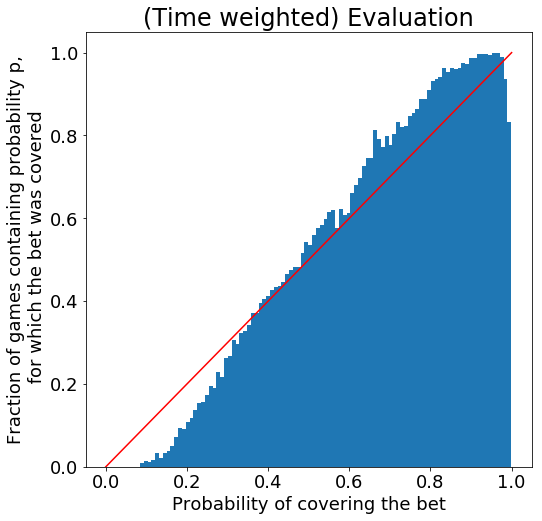

In [25]:
fig,ax = plt.subplots(figsize=(8,8))
ax.bar(bins_d[:-1],final_motherfucking_values, width=np.diff(bins_d),align='edge')
x = np.linspace(0,1)
ax.plot(x,x,color='red')

ax.set_title('(Time weighted) Evaluation', fontsize=24)
ax.set_xlabel('Probability of covering the bet', fontsize=18)
ax.set_ylabel("Fraction of games containing probability p,\n for which the bet was covered", fontsize=18)
ax.tick_params(labelsize=18)

plt.show()